<a href="https://colab.research.google.com/github/JoaoBarroso4/aprovacao-credito/blob/main/Predi%C3%A7%C3%A3o_de_aprova%C3%A7%C3%A3o_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Instalar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [72]:
# Carregar a base de dados. Link do Kaggle: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?resource=download
df = pd.read_csv('/content/databases/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
df.shape

(614, 13)

In [74]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [76]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

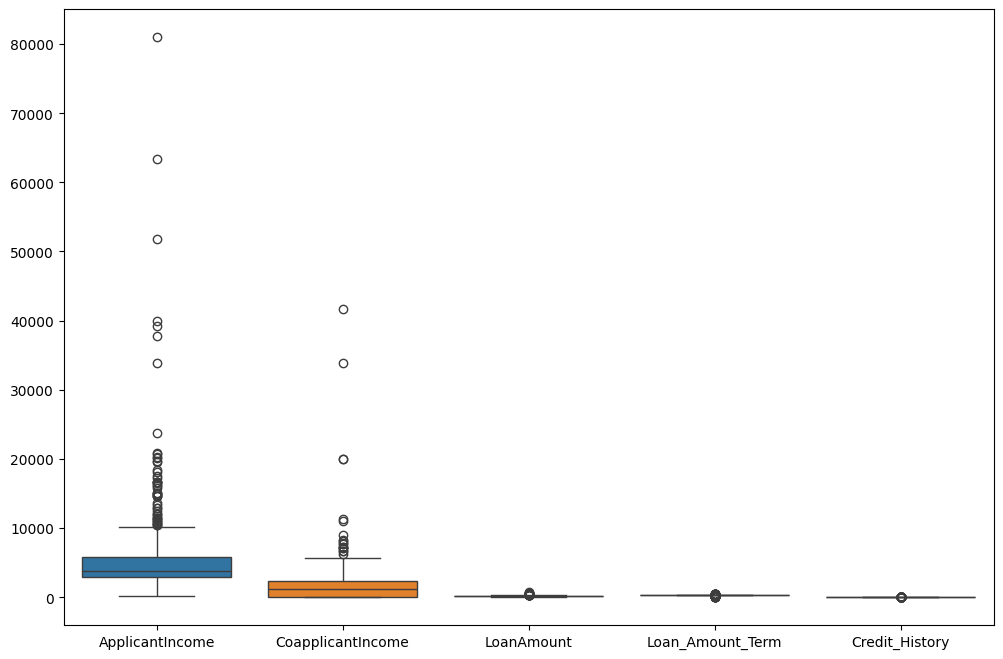

In [77]:
# Buscar por outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)

In [78]:
# Substituir os valores nulos numéricos
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median()) # Tem muitos outliers, então substituimos por mediana
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean()) # Sem muitos outliers, usamos média
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [79]:
# Substituir os valores nulos de objetos
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [80]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

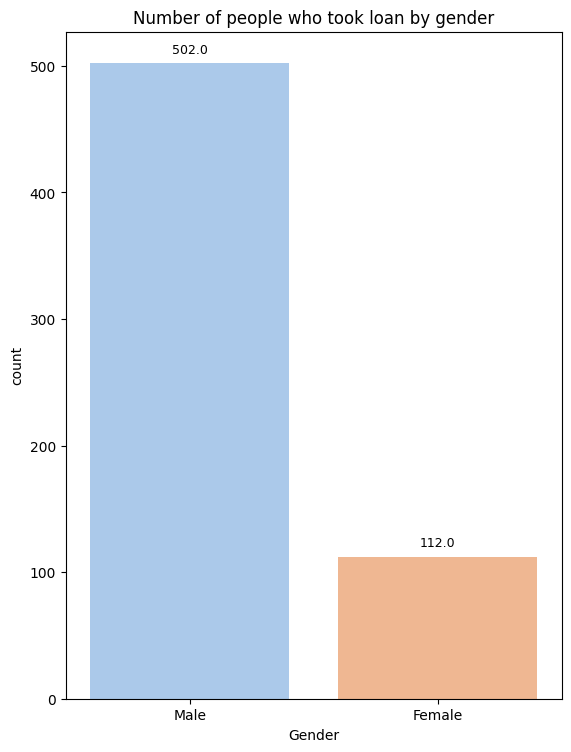

In [81]:
# Criar o countplot
ax = sns.countplot(x='Gender', data=df, palette=sns.color_palette('pastel'))

# Adicionando um título
ax.set_title('Number of people who took loan by gender')

# Adicionando rótulos de dados
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                textcoords='offset points')

# Ajustando escala para rótulos de dados
plt.subplots_adjust(top=1.5)

# Mostrar o gráfico
plt.show()

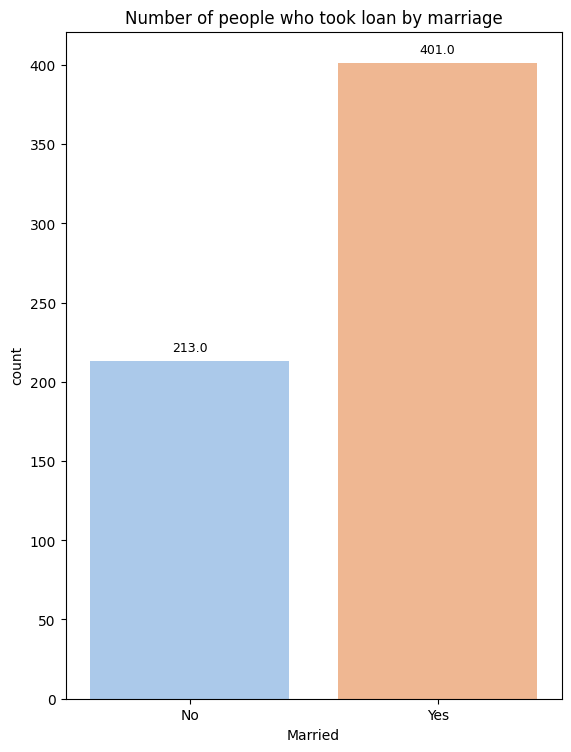

In [82]:
# Criar o countplot
ax = sns.countplot(x='Married', data=df, palette=sns.color_palette('pastel'))

# Adicionando um título
ax.set_title('Number of people who took loan by marriage')

# Adicionando rótulos de dados
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                textcoords='offset points')

# Ajustando escala para rótulos de dados
plt.subplots_adjust(top=1.5)

# Mostrar o gráfico
plt.show()

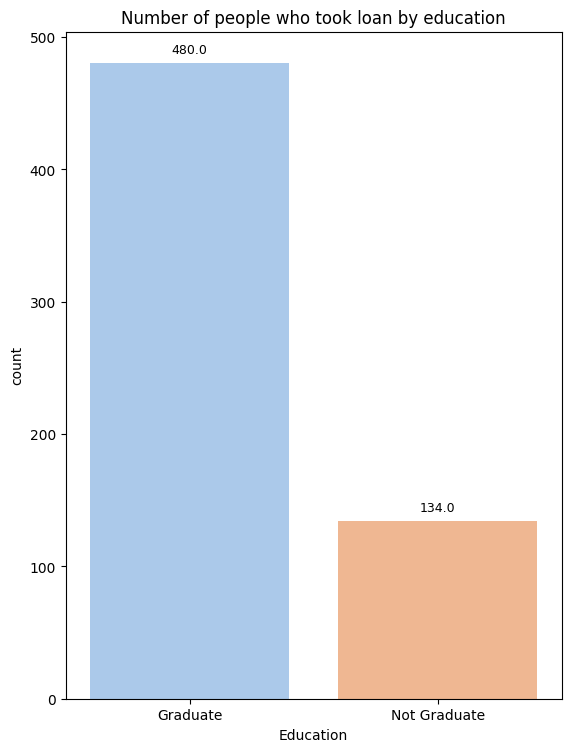

In [83]:
# Criar o countplot
ax = sns.countplot(x='Education', data=df, palette=sns.color_palette('pastel'))

# Adicionando um título
ax.set_title('Number of people who took loan by education')

# Adicionando rótulos de dados
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                textcoords='offset points')

# Ajustando escala para rótulos de dados
plt.subplots_adjust(top=1.5)

# Mostrar o gráfico
plt.show()

<Axes: >

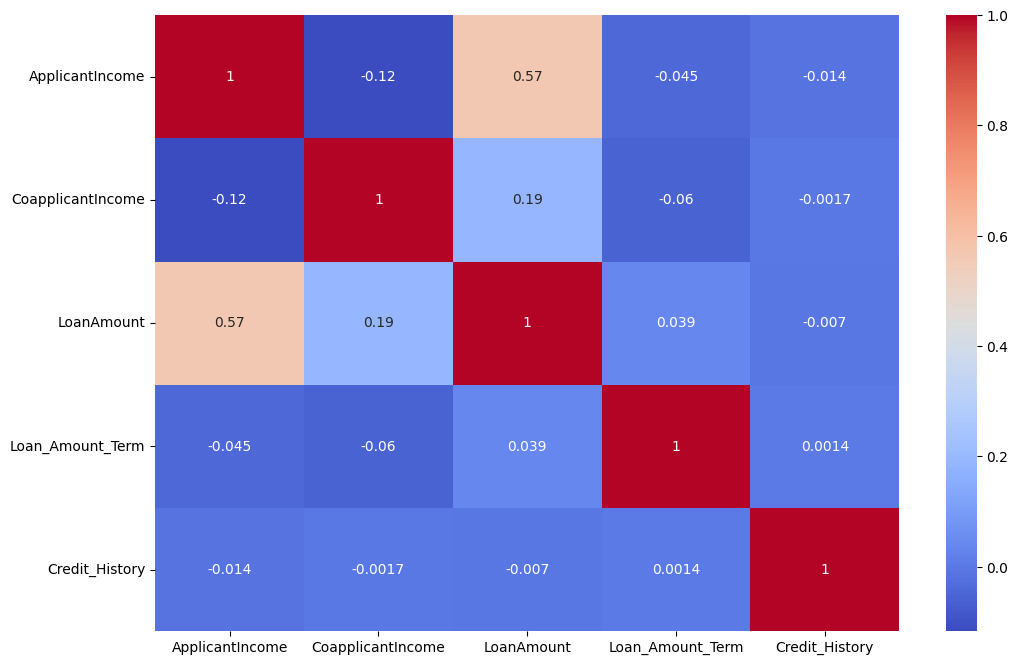

In [84]:
# Analisar a correlação
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [85]:
'''

Como o CoapplicantIncome possui muitos valores zerados, é interessante somá-lo
ao ApplicantIncome em uma única variável TotalIncome

'''
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

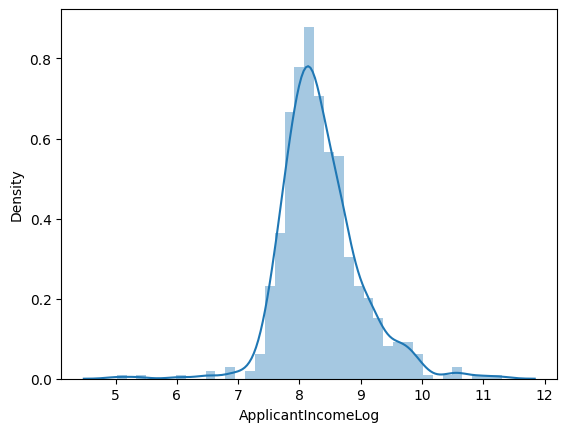

In [86]:
# Aplicar a tranformação logarítmica para normalização do ApplicantIncome

df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'] + 1)
sns.distplot(df['ApplicantIncomeLog'])

In [87]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681


<Axes: xlabel='LoanAmountLog', ylabel='Density'>

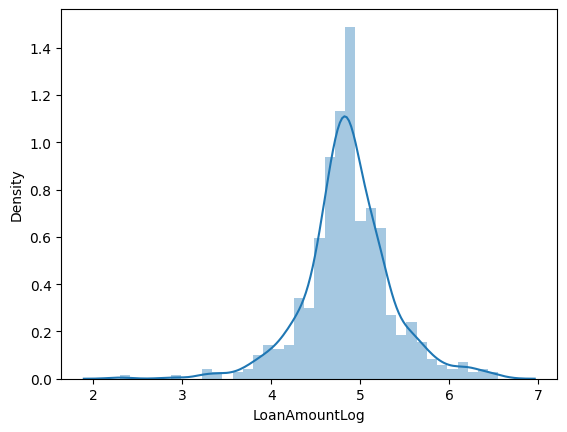

In [88]:
# Aplicar a tranformação logarítmica para normalização do LoanAmount

df['LoanAmountLog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountLog'])

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

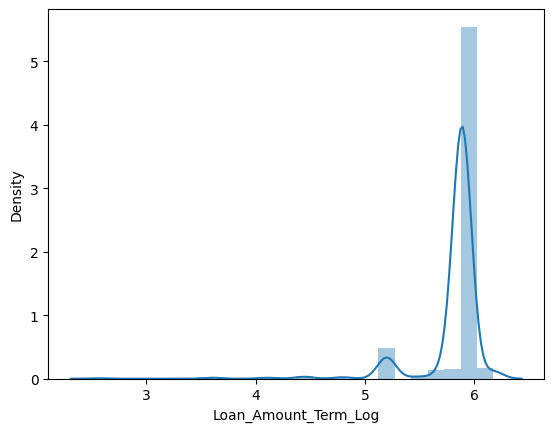

In [89]:
# Aplicar a tranformação logarítmica para normalização do Loan_Amount_Term

df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term_Log'])

<Axes: xlabel='TotalIncomeLog', ylabel='Density'>

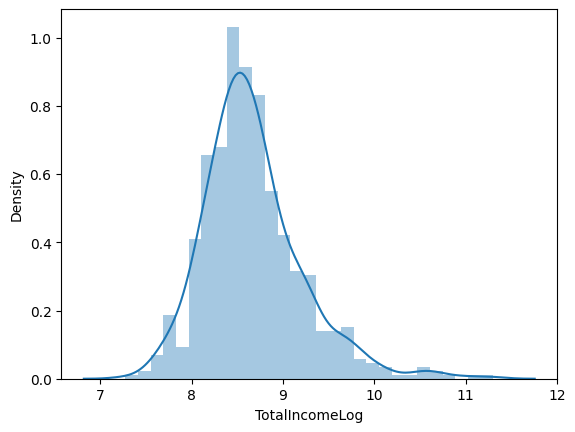

In [90]:
# Aplicar a tranformação logarítmica para normalização do TotalIncome

df['TotalIncomeLog'] = np.log(df['TotalIncome'] + 1)
sns.distplot(df['TotalIncomeLog'])

In [91]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [92]:
# Remover as features não mais necessárias após a normalização
cols_to_drop = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome', 'Loan_ID']
df = df.drop(columns=cols_to_drop, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [93]:
# Aplicar, neste caso, Label Enconding

from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [94]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomeLog
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [95]:
df.dtypes

Gender                    int64
Married                   int64
Dependents                int64
Education                 int64
Self_Employed             int64
Credit_History          float64
Property_Area             int64
Loan_Status               int64
ApplicantIncomeLog      float64
LoanAmountLog           float64
Loan_Amount_Term_Log    float64
TotalIncomeLog          float64
dtype: object

In [96]:
# Separar as features dependentes e independentes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [97]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomeLog
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [98]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [100]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.25, random_state=42)

In [132]:
# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_Train, y_Train)

y_pred_model1 = model1.predict(X_Test)
accuracy = accuracy_score(y_Test, y_pred_model1) # Predições corretas (TP + TN) / Total de predições (TP + FP + TN + FN)
print(f'Precisão da Regressão Logística: {accuracy*100}')

Precisão da Regressão Logística: 77.27272727272727


In [133]:
score = cross_val_score(model1, X, y, cv=5)
print(f'Score da validação cruzada da Regressão Logística: {np.mean(score)*100}')

Score da validação cruzada da Regressão Logística: 80.9462881514061


In [134]:
# Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_Train, y_Train)

y_pred_model2 = model2.predict(X_Test)
accuracy = accuracy_score(y_Test, y_pred_model2)
print(f'Precisão da Árvore de Decisão: {accuracy*100}')

Precisão da Árvore de Decisão: 71.42857142857143


In [135]:
score = cross_val_score(model2, X, y, cv=5)
print(f'Score da validação cruzada da Árvore de Decisão: {np.mean(score)*100}')

Score da validação cruzada da Árvore de Decisão: 71.01026256164201


In [136]:
# Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_Train, y_Train)

y_pred_model3 = model3.predict(X_Test)
accuracy = accuracy_score(y_Test, y_pred_model3)
print(f'Precisão do Random Forest: {accuracy*100}')

Precisão do Random Forest: 79.22077922077922


In [137]:
# KNeighbor
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_Train, y_Train)

y_pred_model4 = model4.predict(X_Test)
accuracy = accuracy_score(y_Test, y_pred_model4)
print(f'Precisão do KNeighbor: {accuracy*100}')

Precisão do KNeighbor: 71.42857142857143


In [131]:
score = cross_val_score(model4, X, y, cv=5)
print(f'Score da validação cruzada do KNeighbor: {np.mean(score)*100}')

Score da validação cruzada do KNeighbor: 73.61721977875517


In [138]:
from sklearn.metrics import classification_report

def generate_classification_report(model, y_Test, y_pred):
  report = classification_report(y_Test, y_pred)
  print(f'Classification Report For {model}:\n{report}\n')

generate_classification_report(model1, y_Test, y_pred_model1)
generate_classification_report(model2, y_Test, y_pred_model2)
generate_classification_report(model3, y_Test, y_pred_model3)
generate_classification_report(model4, y_Test, y_pred_model4)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        54
           1       0.77      0.80      0.78       100

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.89      0.46      0.61        54
           1       0.77      0.97      0.86       100

    accuracy                

In [139]:
# Identificar se os dados estão desbalanceados
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [140]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [141]:
from imblearn.over_sampling import RandomOverSampler

In [142]:
oversample = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Loan_Status')], axis=1)

In [143]:
X_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomeLog
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012


In [144]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int64

In [145]:
# Verificar se o balanceamento funcionou

y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [146]:
X_resampled_Train, X_resampled_Test, y_resampled_Train, y_resampled_Test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [148]:
# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_resampled_Train, y_resampled_Train)

y_pred_model1 = model1.predict(X_resampled_Test)
accuracy = accuracy_score(y_resampled_Test, y_pred_model1)
print(f'Precisão da Regressão Logística: {accuracy*100}')

Precisão da Regressão Logística: 69.66824644549763


In [149]:
# Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_resampled_Train, y_resampled_Train)

y_pred_model2 = model2.predict(X_resampled_Test)
accuracy = accuracy_score(y_resampled_Test, y_pred_model2)
print(f'Precisão da Árvore de Decisão: {accuracy*100}')

Precisão da Árvore de Decisão: 80.09478672985783


In [150]:
# Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_resampled_Train, y_resampled_Train)

y_pred_model3 = model3.predict(X_resampled_Test)
accuracy = accuracy_score(y_resampled_Test, y_pred_model3)
print(f'Precisão do Random Forest: {accuracy*100}')

Precisão do Random Forest: 87.20379146919431


In [151]:
# KNeighbor
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_resampled_Train, y_resampled_Train)

y_pred_model4 = model4.predict(X_resampled_Test)
accuracy = accuracy_score(y_resampled_Test, y_pred_model4)
print(f'Precisão do KNeighbor: {accuracy*100}')

Precisão do KNeighbor: 72.51184834123224


In [152]:
from sklearn.metrics import classification_report

def generate_classification_report(model, y_Test, y_pred):
  report = classification_report(y_Test, y_pred)
  print(f'Classification Report For {model}:\n{report}\n')

generate_classification_report(model1, y_resampled_Test, y_pred_model1)
generate_classification_report(model2, y_resampled_Test, y_pred_model2)
generate_classification_report(model3, y_resampled_Test, y_pred_model3)
generate_classification_report(model4, y_resampled_Test, y_pred_model4)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.85      0.54      0.66       114
           1       0.62      0.89      0.73        97

    accuracy                           0.70       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.74      0.70      0.69       211


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       114
           1       0.82      0.73      0.77        97

    accuracy                           0.80       211
   macro avg       0.80      0.80      0.80       211
weighted avg       0.80      0.80      0.80       211


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       114
           1       0.84      0.89      0.86        97

    accuracy                